In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn xgboost lightgbm joblib


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   - -------------------------------------- 1.6/56.8 MB 9.3 MB/s eta 0:00:06
   -- ------------------------------------- 3.7/56.8 MB 9.5 MB/s eta 0:00:06
   ----- ---------------------------------- 7.9/56.8 MB 13.1 MB/s eta 0:00:04
   -------- ------------------------------- 11.5/56.8 MB 14.4 MB/s eta 0:00:04
   ---------- ----------------------------- 15.5/56.8 MB 15.2 MB/s eta 0:00:03
   ------------- -------------------------- 19.7/56.8 MB 16.1 MB/s eta 0:00:03
   ---------------- ----------------------- 23.9/56.8 MB 16.8 MB/s eta 0:00:02
   ------------------- -------------------- 27.8/56.8 MB 16.9 MB/s eta 0:00:02
   --------------------- ------------------ 31.2/56.8 MB 16.9 MB/s eta 0:00:02
   ----------------------- ---------------- 33.8/56.8 MB 16.4 MB/s eta 0:00:02
   ------------------------- -------------- 36.4/56.8 MB 16.1 MB/s eta 0:00:02
   ---------------------------- ----------- 39.8/56.8 MB 16.0 MB/s

MULTI-MODEL COMPARISON FOR CROP PRODUCTION PREDICTION

[1] Loading and Preparing Dataset...

Dataset Shape: (242361, 7)

First 5 rows:
                    State_Name District_Name  Crop_Year      Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000      Kharif   
1  Andaman and Nicobar Islands      NICOBARS       2000      Kharif   
2  Andaman and Nicobar Islands      NICOBARS       2000      Kharif   
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year   
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year   

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242361 entries, 0 to 242360
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 

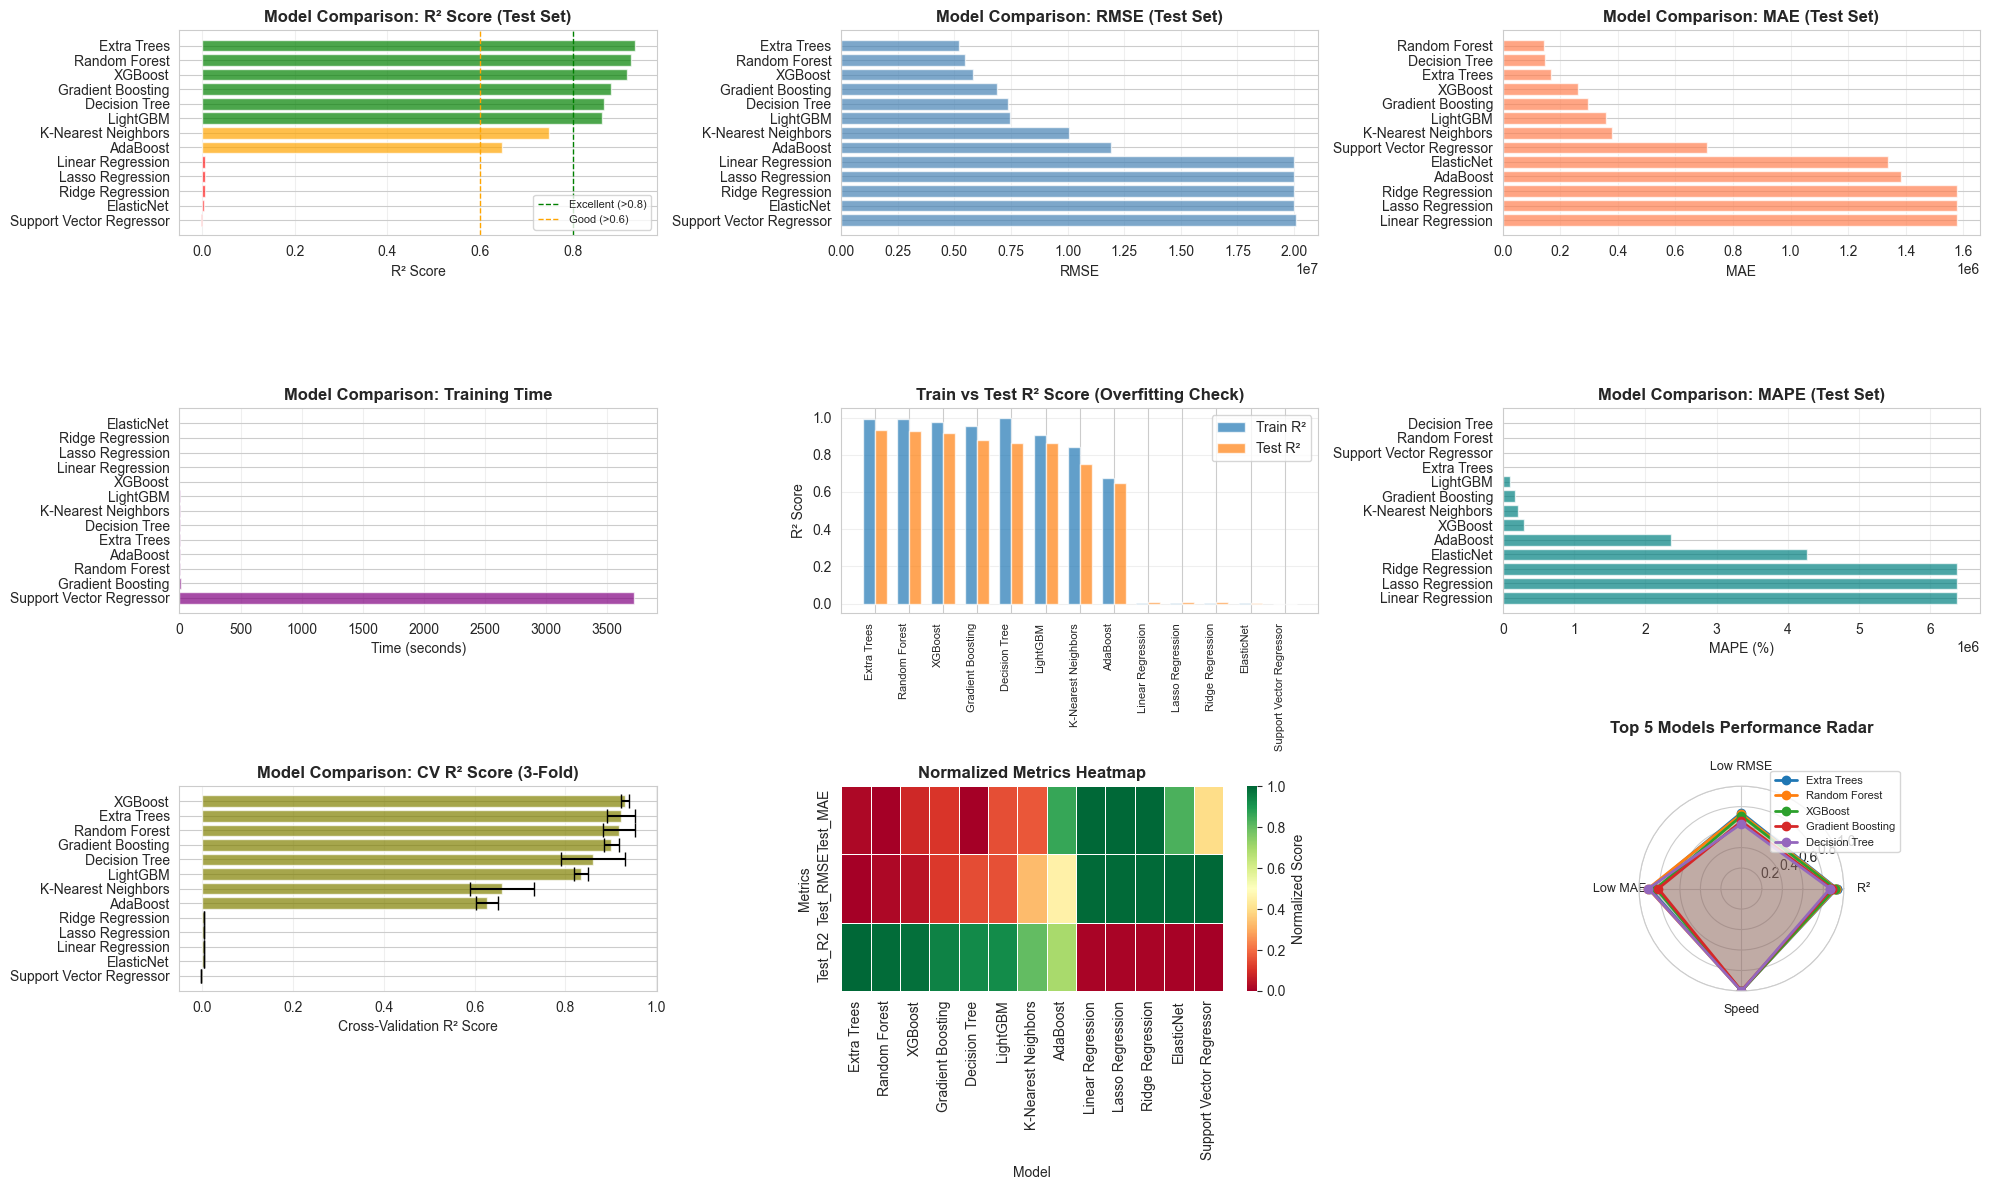


BEST MODEL ANALYSIS

🏆 Best Model: Extra Trees

Performance Metrics:
  - Test R² Score: 0.933183
  - Test RMSE: 5,184,897.10
  - Test MAE: 166,493.09
  - Test MAPE: 6356.56%
  - Training Time: 1.72 seconds
  - CV R² Score: 0.921723 (±0.030211)

  ✓ Best model analysis saved as 'best_model_analysis.png'


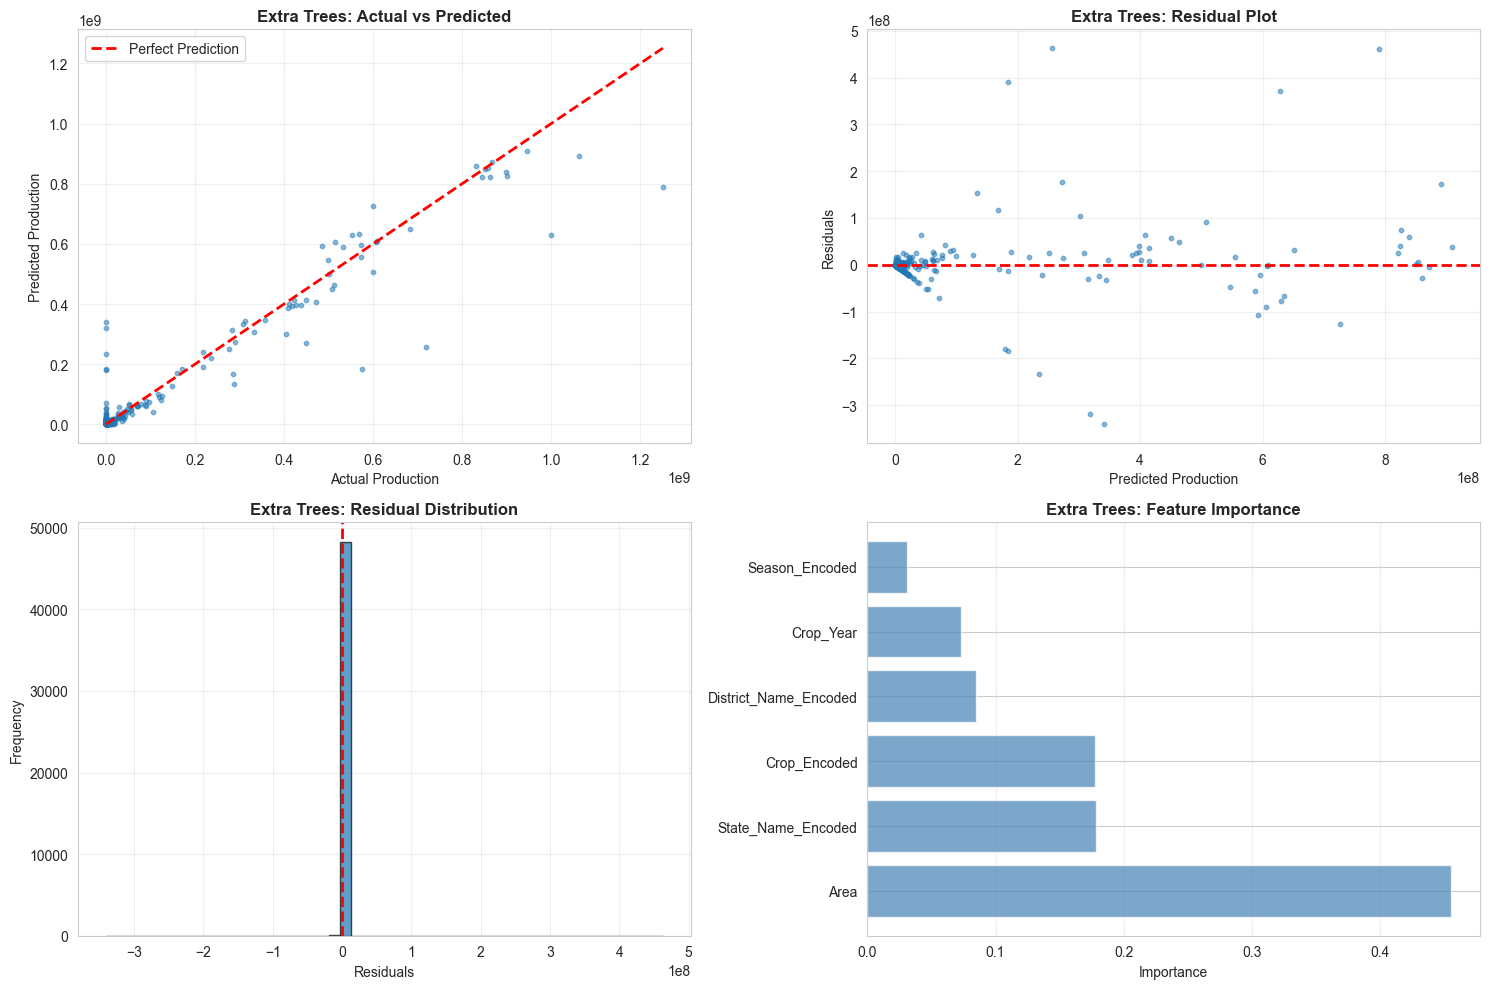


SAVING RESULTS AND BEST MODEL

✓ Comparison results saved: model_comparison_results.csv
✓ Best model saved: best_model_extra_trees.joblib
✓ Label encoders saved: label_encoders.pkl
✓ Metadata saved: model_metadata.pkl

FINAL SUMMARY AND RECOMMENDATIONS

🎯 MODEL SELECTION SUMMARY:
   Best Model: Extra Trees
   Reason: Highest Test R² Score (0.933183)

📊 PERFORMANCE COMPARISON:
   Best R²: 0.933183 (Extra Trees)
   Worst R²: -0.001247 (Support Vector Regressor)
   Performance Range: 0.934430

⚡ EFFICIENCY COMPARISON:
   Fastest Model: ElasticNet 
   (0.03s)
   Slowest Model: Support Vector Regressor 
   (3721.45s)

💡 RECOMMENDATIONS:
   ✓ The Extra Trees shows excellent performance (R² > 0.9)
   ✓ No significant overfitting detected (Train-Test R² gap: 0.0615)

ANALYSIS COMPLETE!

Generated Files:
  1. model_comparison_results.csv
  2. model_comparison_analysis.png
  3. best_model_analysis.png
  4. best_model_extra_trees.joblib
  5. label_encoders.pkl
  6. model_metadata.pkl

✅ All mode

In [2]:
# Multi-Model Comparison for Crop Production Prediction
# Dataset: cleaned_crop_data.csv
# Goal: Compare multiple regression models and select the best one

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             mean_absolute_percentage_error)
import time
import warnings
warnings.filterwarnings('ignore')

# Import regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                              AdaBoostRegressor, ExtraTreesRegressor)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import joblib
import pickle

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*80)
print("MULTI-MODEL COMPARISON FOR CROP PRODUCTION PREDICTION")
print("="*80)

# ==============================================================================
# 1. LOAD AND PREPARE DATA
# ==============================================================================

print("\n[1] Loading and Preparing Dataset...")
df = pd.read_csv('cleaned_crop_data.csv')

print(f"\nDataset Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values
print("\n[2] Cleaning Data...")
df = df.dropna(subset=['Production'])
print(f"Dataset shape after removing missing Production values: {df.shape}")

# Encode categorical variables
print("\n[3] Encoding Categorical Features...")
label_encoders = {}
categorical_columns = ['State_Name', 'District_Name', 'Season', 'Crop']

for column in categorical_columns:
    le = LabelEncoder()
    df[column + '_Encoded'] = le.fit_transform(df[column])
    label_encoders[column] = le
    print(f"  - {column}: {len(le.classes_)} unique values")

# Prepare features and target
feature_columns = ['State_Name_Encoded', 'District_Name_Encoded', 
                   'Crop_Year', 'Season_Encoded', 'Crop_Encoded', 'Area']
X = df[feature_columns]
y = df['Production']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data
print("\n[4] Splitting Data (80-20 Train-Test Split)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Scale features for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================================================================
# 2. DEFINE MODELS TO COMPARE
# ==============================================================================

print("\n[5] Initializing Models...")
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=1.0, random_state=42),
    'ElasticNet': ElasticNet(alpha=1.0, random_state=42),
    'Decision Tree': DecisionTreeRegressor(max_depth=20, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=50, max_depth=15, 
                                          random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=50, max_depth=5,
                                                   random_state=42),
    'XGBoost': XGBRegressor(n_estimators=50, max_depth=5, random_state=42,
                           n_jobs=-1),
    'LightGBM': LGBMRegressor(n_estimators=50, max_depth=5, random_state=42,
                             n_jobs=-1, verbose=-1),
    'Extra Trees': ExtraTreesRegressor(n_estimators=50, max_depth=15,
                                      random_state=42, n_jobs=-1),
    'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5, n_jobs=-1),
    'Support Vector Regressor': SVR(kernel='rbf', C=1.0)
}

# Models that need scaled features
scaled_models = ['Ridge Regression', 'Lasso Regression', 'ElasticNet',
                'Support Vector Regressor', 'K-Nearest Neighbors']

print(f"Total models to compare: {len(models)}")
for model_name in models.keys():
    print(f"  - {model_name}")

# ==============================================================================
# 3. TRAIN AND EVALUATE ALL MODELS
# ==============================================================================

print("\n" + "="*80)
print("TRAINING AND EVALUATING MODELS")
print("="*80)

results = []

for model_name, model in models.items():
    print(f"\n[Training {model_name}...]")
    
    # Select appropriate data (scaled or not)
    if model_name in scaled_models:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test
    
    # Train the model and measure time
    start_time = time.time()
    model.fit(X_tr, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    y_train_pred = model.predict(X_tr)
    y_test_pred = model.predict(X_te)
    
    # Calculate metrics
    # Training metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Testing metrics
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # MAPE (Mean Absolute Percentage Error)
    # Avoid division by zero
    non_zero_mask = y_test != 0
    if non_zero_mask.sum() > 0:
        test_mape = np.mean(np.abs((y_test[non_zero_mask] - y_test_pred[non_zero_mask]) / 
                                   y_test[non_zero_mask])) * 100
    else:
        test_mape = np.inf
    
    # Cross-validation score (3-fold to save time)
    try:
        cv_scores = cross_val_score(model, X_tr, y_train, cv=3, 
                                   scoring='r2', n_jobs=-1)
        cv_r2_mean = cv_scores.mean()
        cv_r2_std = cv_scores.std()
    except:
        cv_r2_mean = np.nan
        cv_r2_std = np.nan
    
    # Store results
    results.append({
        'Model': model_name,
        'Train_MAE': train_mae,
        'Train_RMSE': train_rmse,
        'Train_R2': train_r2,
        'Test_MAE': test_mae,
        'Test_RMSE': test_rmse,
        'Test_R2': test_r2,
        'Test_MAPE': test_mape,
        'CV_R2_Mean': cv_r2_mean,
        'CV_R2_Std': cv_r2_std,
        'Training_Time': training_time
    })
    
    print(f"  ✓ Completed - Test R²: {test_r2:.4f}, Test RMSE: {test_rmse:,.2f}")

# ==============================================================================
# 4. CREATE RESULTS DATAFRAME
# ==============================================================================

print("\n" + "="*80)
print("MODEL COMPARISON RESULTS")
print("="*80)

results_df = pd.DataFrame(results)

# Sort by Test R² score (descending)
results_df = results_df.sort_values('Test_R2', ascending=False).reset_index(drop=True)

print("\n--- Complete Results Table ---")
print(results_df.to_string(index=False))

# Display top 5 models
print("\n--- Top 5 Models (by Test R² Score) ---")
top_5 = results_df.head(5)[['Model', 'Test_R2', 'Test_RMSE', 'Test_MAE', 'Training_Time']]
print(top_5.to_string(index=False))

# ==============================================================================
# 5. COMPARATIVE VISUALIZATIONS
# ==============================================================================

print("\n[6] Creating Comparative Visualizations...")

# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 12))

# 1. R² Score Comparison
ax1 = plt.subplot(3, 3, 1)
results_sorted = results_df.sort_values('Test_R2', ascending=True)
colors = ['green' if x > 0.8 else 'orange' if x > 0.6 else 'red' 
          for x in results_sorted['Test_R2']]
ax1.barh(results_sorted['Model'], results_sorted['Test_R2'], color=colors, alpha=0.7)
ax1.axvline(x=0.8, color='green', linestyle='--', linewidth=1, label='Excellent (>0.8)')
ax1.axvline(x=0.6, color='orange', linestyle='--', linewidth=1, label='Good (>0.6)')
ax1.set_xlabel('R² Score')
ax1.set_title('Model Comparison: R² Score (Test Set)', fontweight='bold', fontsize=12)
ax1.legend(loc='lower right', fontsize=8)
ax1.grid(axis='x', alpha=0.3)

# 2. RMSE Comparison
ax2 = plt.subplot(3, 3, 2)
results_sorted_rmse = results_df.sort_values('Test_RMSE', ascending=False)
ax2.barh(results_sorted_rmse['Model'], results_sorted_rmse['Test_RMSE'], 
         color='steelblue', alpha=0.7)
ax2.set_xlabel('RMSE')
ax2.set_title('Model Comparison: RMSE (Test Set)', fontweight='bold', fontsize=12)
ax2.grid(axis='x', alpha=0.3)

# 3. MAE Comparison
ax3 = plt.subplot(3, 3, 3)
results_sorted_mae = results_df.sort_values('Test_MAE', ascending=False)
ax3.barh(results_sorted_mae['Model'], results_sorted_mae['Test_MAE'], 
         color='coral', alpha=0.7)
ax3.set_xlabel('MAE')
ax3.set_title('Model Comparison: MAE (Test Set)', fontweight='bold', fontsize=12)
ax3.grid(axis='x', alpha=0.3)

# 4. Training Time Comparison
ax4 = plt.subplot(3, 3, 4)
results_sorted_time = results_df.sort_values('Training_Time', ascending=False)
ax4.barh(results_sorted_time['Model'], results_sorted_time['Training_Time'], 
         color='purple', alpha=0.7)
ax4.set_xlabel('Time (seconds)')
ax4.set_title('Model Comparison: Training Time', fontweight='bold', fontsize=12)
ax4.grid(axis='x', alpha=0.3)

# 5. Train vs Test R² (Overfitting Check)
ax5 = plt.subplot(3, 3, 5)
x_pos = np.arange(len(results_df))
width = 0.35
ax5.bar(x_pos - width/2, results_df['Train_R2'], width, label='Train R²', alpha=0.7)
ax5.bar(x_pos + width/2, results_df['Test_R2'], width, label='Test R²', alpha=0.7)
ax5.set_ylabel('R² Score')
ax5.set_title('Train vs Test R² Score (Overfitting Check)', fontweight='bold', fontsize=12)
ax5.set_xticks(x_pos)
ax5.set_xticklabels(results_df['Model'], rotation=90, ha='right', fontsize=8)
ax5.legend()
ax5.grid(axis='y', alpha=0.3)

# 6. MAPE Comparison (excluding infinite values)
ax6 = plt.subplot(3, 3, 6)
results_mape = results_df[results_df['Test_MAPE'] != np.inf].sort_values('Test_MAPE', ascending=False)
if len(results_mape) > 0:
    ax6.barh(results_mape['Model'], results_mape['Test_MAPE'], color='teal', alpha=0.7)
    ax6.set_xlabel('MAPE (%)')
    ax6.set_title('Model Comparison: MAPE (Test Set)', fontweight='bold', fontsize=12)
    ax6.grid(axis='x', alpha=0.3)

# 7. Cross-Validation R² with Error Bars
ax7 = plt.subplot(3, 3, 7)
results_cv = results_df.dropna(subset=['CV_R2_Mean']).sort_values('CV_R2_Mean', ascending=True)
ax7.barh(results_cv['Model'], results_cv['CV_R2_Mean'], 
         xerr=results_cv['CV_R2_Std'], color='olive', alpha=0.7, capsize=5)
ax7.set_xlabel('Cross-Validation R² Score')
ax7.set_title('Model Comparison: CV R² Score (3-Fold)', fontweight='bold', fontsize=12)
ax7.grid(axis='x', alpha=0.3)

# 8. Error Metrics Heatmap
ax8 = plt.subplot(3, 3, 8)
heatmap_data = results_df[['Model', 'Test_MAE', 'Test_RMSE', 'Test_R2']].set_index('Model')
# Normalize for better visualization
heatmap_normalized = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())
sns.heatmap(heatmap_normalized.T, annot=False, cmap='RdYlGn', cbar_kws={'label': 'Normalized Score'},
            ax=ax8, linewidths=0.5)
ax8.set_title('Normalized Metrics Heatmap', fontweight='bold', fontsize=12)
ax8.set_ylabel('Metrics')

# 9. Model Performance Radar Chart (Top 5 Models)
ax9 = plt.subplot(3, 3, 9, projection='polar')
top_5_models = results_df.head(5)
categories = ['R²', 'Low RMSE', 'Low MAE', 'Speed']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

for idx, row in top_5_models.iterrows():
    values = [
        row['Test_R2'],
        1 - (row['Test_RMSE'] / results_df['Test_RMSE'].max()),  # Inverted
        1 - (row['Test_MAE'] / results_df['Test_MAE'].max()),    # Inverted
        1 - (row['Training_Time'] / results_df['Training_Time'].max())  # Inverted
    ]
    values += values[:1]
    ax9.plot(angles, values, 'o-', linewidth=2, label=row['Model'])
    ax9.fill(angles, values, alpha=0.15)

ax9.set_xticks(angles[:-1])
ax9.set_xticklabels(categories, size=9)
ax9.set_ylim(0, 1)
ax9.set_title('Top 5 Models Performance Radar', fontweight='bold', fontsize=12, pad=20)
ax9.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=8)
ax9.grid(True)

plt.tight_layout()
plt.savefig('model_comparison_analysis.png', dpi=300, bbox_inches='tight')
print("  ✓ Visualizations saved as 'model_comparison_analysis.png'")
plt.show()

# ==============================================================================
# 6. DETAILED ANALYSIS OF BEST MODEL
# ==============================================================================

print("\n" + "="*80)
print("BEST MODEL ANALYSIS")
print("="*80)

best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"\n🏆 Best Model: {best_model_name}")
print(f"\nPerformance Metrics:")
print(f"  - Test R² Score: {results_df.iloc[0]['Test_R2']:.6f}")
print(f"  - Test RMSE: {results_df.iloc[0]['Test_RMSE']:,.2f}")
print(f"  - Test MAE: {results_df.iloc[0]['Test_MAE']:,.2f}")
print(f"  - Test MAPE: {results_df.iloc[0]['Test_MAPE']:.2f}%")
print(f"  - Training Time: {results_df.iloc[0]['Training_Time']:.2f} seconds")
print(f"  - CV R² Score: {results_df.iloc[0]['CV_R2_Mean']:.6f} (±{results_df.iloc[0]['CV_R2_Std']:.6f})")

# Retrain best model and get predictions
if best_model_name in scaled_models:
    best_model.fit(X_train_scaled, y_train)
    y_pred_best = best_model.predict(X_test_scaled)
else:
    best_model.fit(X_train, y_train)
    y_pred_best = best_model.predict(X_test)

# Residual Analysis
residuals = y_test - y_pred_best

# Create detailed plots for best model
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred_best, alpha=0.5, s=10)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Production')
axes[0, 0].set_ylabel('Predicted Production')
axes[0, 0].set_title(f'{best_model_name}: Actual vs Predicted', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residual Plot
axes[0, 1].scatter(y_pred_best, residuals, alpha=0.5, s=10)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Production')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title(f'{best_model_name}: Residual Plot', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residual Distribution
axes[1, 0].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title(f'{best_model_name}: Residual Distribution', fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].grid(True, alpha=0.3)

# 4. Feature Importance (if available)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    axes[1, 1].barh(feature_importance['Feature'], feature_importance['Importance'], 
                    color='steelblue', alpha=0.7)
    axes[1, 1].set_xlabel('Importance')
    axes[1, 1].set_title(f'{best_model_name}: Feature Importance', fontweight='bold')
    axes[1, 1].grid(axis='x', alpha=0.3)
elif hasattr(best_model, 'coef_'):
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Coefficient': np.abs(best_model.coef_)
    }).sort_values('Coefficient', ascending=False)
    
    axes[1, 1].barh(feature_importance['Feature'], feature_importance['Coefficient'], 
                    color='steelblue', alpha=0.7)
    axes[1, 1].set_xlabel('Absolute Coefficient')
    axes[1, 1].set_title(f'{best_model_name}: Feature Coefficients', fontweight='bold')
    axes[1, 1].grid(axis='x', alpha=0.3)
else:
    axes[1, 1].text(0.5, 0.5, 'Feature importance\nnot available\nfor this model', 
                    ha='center', va='center', fontsize=12)
    axes[1, 1].set_title(f'{best_model_name}: Feature Importance', fontweight='bold')

plt.tight_layout()
plt.savefig('best_model_analysis.png', dpi=300, bbox_inches='tight')
print("\n  ✓ Best model analysis saved as 'best_model_analysis.png'")
plt.show()

# ==============================================================================
# 7. SAVE BEST MODEL AND RESULTS
# ==============================================================================

print("\n" + "="*80)
print("SAVING RESULTS AND BEST MODEL")
print("="*80)

# Save comparison results to CSV
results_df.to_csv('model_comparison_results.csv', index=False)
print("\n✓ Comparison results saved: model_comparison_results.csv")

# Save best model
best_model_filename = f'best_model_{best_model_name.replace(" ", "_").lower()}.joblib'
joblib.dump(best_model, best_model_filename, compress=3)
print(f"✓ Best model saved: {best_model_filename}")

# Save scaler if needed
if best_model_name in scaled_models:
    scaler_filename = 'scaler.pkl'
    with open(scaler_filename, 'wb') as f:
        pickle.dump(scaler, f)
    print(f"✓ Scaler saved: {scaler_filename}")

# Save encoders
encoders_filename = 'label_encoders.pkl'
with open(encoders_filename, 'wb') as f:
    pickle.dump(label_encoders, f)
print(f"✓ Label encoders saved: {encoders_filename}")

# Save metadata
metadata = {
    'best_model': best_model_name,
    'feature_columns': feature_columns,
    'test_r2': results_df.iloc[0]['Test_R2'],
    'test_rmse': results_df.iloc[0]['Test_RMSE'],
    'test_mae': results_df.iloc[0]['Test_MAE'],
    'requires_scaling': best_model_name in scaled_models
}
metadata_filename = 'model_metadata.pkl'
with open(metadata_filename, 'wb') as f:
    pickle.dump(metadata, f)
print(f"✓ Metadata saved: {metadata_filename}")

# ==============================================================================
# 8. FINAL SUMMARY AND RECOMMENDATIONS
# ==============================================================================

print("\n" + "="*80)
print("FINAL SUMMARY AND RECOMMENDATIONS")
print("="*80)

print(f"\n🎯 MODEL SELECTION SUMMARY:")
print(f"   Best Model: {best_model_name}")
print(f"   Reason: Highest Test R² Score ({results_df.iloc[0]['Test_R2']:.6f})")

print(f"\n📊 PERFORMANCE COMPARISON:")
print(f"   Best R²: {results_df.iloc[0]['Test_R2']:.6f} ({best_model_name})")
print(f"   Worst R²: {results_df.iloc[-1]['Test_R2']:.6f} ({results_df.iloc[-1]['Model']})")
print(f"   Performance Range: {(results_df.iloc[0]['Test_R2'] - results_df.iloc[-1]['Test_R2']):.6f}")

print(f"\n⚡ EFFICIENCY COMPARISON:")
print(f"   Fastest Model: {results_df.sort_values('Training_Time').iloc[0]['Model']} ")
print(f"   ({results_df.sort_values('Training_Time').iloc[0]['Training_Time']:.2f}s)")
print(f"   Slowest Model: {results_df.sort_values('Training_Time').iloc[-1]['Model']} ")
print(f"   ({results_df.sort_values('Training_Time').iloc[-1]['Training_Time']:.2f}s)")

print(f"\n💡 RECOMMENDATIONS:")
if results_df.iloc[0]['Test_R2'] > 0.9:
    print(f"   ✓ The {best_model_name} shows excellent performance (R² > 0.9)")
elif results_df.iloc[0]['Test_R2'] > 0.8:
    print(f"   ✓ The {best_model_name} shows good performance (R² > 0.8)")
else:
    print(f"   ⚠ Consider hyperparameter tuning to improve performance")

overfit_check = results_df.iloc[0]['Train_R2'] - results_df.iloc[0]['Test_R2']
if overfit_check > 0.1:
    print(f"   ⚠ Model may be overfitting (Train-Test R² gap: {overfit_check:.4f})")
    print(f"   → Consider regularization or reducing model complexity")
else:
    print(f"   ✓ No significant overfitting detected (Train-Test R² gap: {overfit_check:.4f})")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)
print("\nGenerated Files:")
print("  1. model_comparison_results.csv")
print("  2. model_comparison_analysis.png")
print("  3. best_model_analysis.png")
print(f"  4. {best_model_filename}")
print(f"  5. {encoders_filename}")
print(f"  6. {metadata_filename}")
if best_model_name in scaled_models:
    print(f"  7. {scaler_filename}")
print("\n✅ All models compared and best model selected successfully!")
